In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import pathlib

from IPython.display import display, HTML

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
df_train = pd.read_parquet("../data/train.parquet")
df_val = pd.read_parquet("../data/val.parquet")
df_test = pd.read_parquet("../data/test.parquet")

print(f"Shape of the training data : {df_train.shape}")
print(f"Shape of the validation data : {df_val.shape}")
print(f"Shape of the test data : {df_test.shape}")

Shape of the training data : (2060626, 13)
Shape of the validation data : (257578, 13)
Shape of the test data : (257579, 13)


# Dataset Statistics

## Training Dataset

In [13]:
HTML(df_train.drop('r_id', axis=1).describe().T.style\
     .set_table_styles([
    {'selector':'th.col_heading', 'props':'background-color:royalblue; font-size:1.2em'},
    {'selector':'th.row_heading', 'props':'background-color:royalblue; font-size:1.0em'},
    {'selector':'td:hover', 'props':'background-color:skyblue'}
])\
     .to_html())

,count,mean,std,min,25%,50%,75%,max
r_stars,2060626.000000,-0.000000,1.000000,-1.693936,-1.044159,0.255394,0.905171,0.905171
r_stars_square,2060626.000000,-0.000000,1.000000,-1.494513,-1.182692,0.064590,1.000051,1.000051
r_length,2060626.000000,-0.000000,1.000000,-1.158545,-0.663186,-0.280804,0.327531,8.122912
u_friends_count,2060626.000000,-0.000000,1.000000,-0.331709,-0.329944,-0.262876,-0.036962,26.131940
u_review_count,2060626.000000,0.000000,1.000000,-0.385583,-0.363408,-0.296885,-0.030793,34.837332
u_month_age,2060626.000000,0.000000,1.000000,-1.237169,-0.842400,-0.182375,0.648629,4.604853
b_stars,2060626.000000,-0.000000,1.000000,-3.451613,-0.305414,0.323826,0.953066,1.582306
b_review_count,2060626.000000,0.000000,1.000000,-0.498458,-0.445966,-0.318485,0.006966,10.844334
r_sen,2060626.000000,0.000000,1.000000,-6.135095,-0.634691,-0.007891,0.612847,4.243026
r_sub,2060626.000000,-0.000000,1.000000,-3.029519,-0.655723,-0.020570,0.633399,3.785211


## Validation Dataset

In [16]:
HTML(df_val.drop('r_id', axis=1).describe().T.style\
     .set_table_styles([
    {'selector':'th.col_heading', 'props':'background-color:orangered; font-size:1.2em'},
    {'selector':'th.row_heading', 'props':'background-color:orangered; font-size:1.0em'},
    {'selector':'td:hover', 'props':'background-color:darkorange'}
])\
     .to_html())

,count,mean,std,min,25%,50%,75%,max
r_stars,257578.000000,0.003854,0.997592,-1.693936,-1.044159,0.255394,0.905171,0.905171
r_stars_square,257578.000000,0.003266,0.998444,-1.494513,-1.182692,0.064590,1.000051,1.000051
r_length,257578.000000,-0.002699,0.992817,-1.149855,-0.663186,-0.280804,0.318840,7.905650
u_friends_count,257578.000000,-0.000846,1.002798,-0.331709,-0.329944,-0.262876,-0.036962,26.131940
u_review_count,257578.000000,-0.000419,1.017864,-0.385583,-0.363408,-0.294870,-0.028778,34.837332
u_month_age,257578.000000,-0.000019,1.000323,-1.237169,-0.841620,-0.183345,0.649244,4.562570
b_stars,257578.000000,0.002156,1.000059,-3.451613,-0.305414,0.323826,0.953066,1.582306
b_review_count,257578.000000,-0.005032,0.991100,-0.498458,-0.445966,-0.318485,0.000967,10.844334
r_sen,257578.000000,0.001775,0.999998,-6.135095,-0.630165,-0.005948,0.612855,4.243026
r_sub,257578.000000,0.001764,0.999262,-3.029519,-0.652882,-0.019677,0.633399,3.785211


## Test Dataset

In [19]:
HTML(df_test.drop('r_id', axis=1).describe().T.style\
     .set_table_styles([
    {'selector':'th.col_heading', 'props':'background-color:red; font-size:1.2em'},
    {'selector':'th.row_heading', 'props':'background-color:red; font-size:1.0em'},
    {'selector':'td:hover', 'props':'background-color:red'}
])\
     .to_html())

,count,mean,std,min,25%,50%,75%,max
r_stars,257579.000000,0.000000,0.999460,-1.693936,-1.044159,0.255394,0.905171,0.905171
r_stars_square,257579.000000,-0.000266,0.999586,-1.494513,-1.182692,0.064590,1.000051,1.000051
r_length,257579.000000,0.000130,0.999808,-1.149855,-0.663186,-0.289495,0.327531,7.957793
u_friends_count,257579.000000,0.002015,1.008457,-0.331709,-0.329944,-0.262876,-0.036962,26.131940
u_review_count,257579.000000,0.000507,1.010715,-0.385583,-0.363408,-0.296885,-0.032809,34.837332
u_month_age,257579.000000,0.002045,1.000518,-1.237169,-0.842470,-0.178080,0.648514,4.532194
b_stars,257579.000000,0.000723,0.999908,-3.451613,-0.305414,0.323826,0.953066,1.582306
b_review_count,257579.000000,-0.002779,0.992417,-0.498458,-0.445966,-0.316985,0.008466,10.844334
r_sen,257579.000000,0.000142,0.997628,-6.135095,-0.633882,-0.009119,0.612707,4.243026
r_sub,257579.000000,0.000573,1.002285,-3.029519,-0.656534,-0.019677,0.634748,3.785211


# Distribution of the 11 features + target

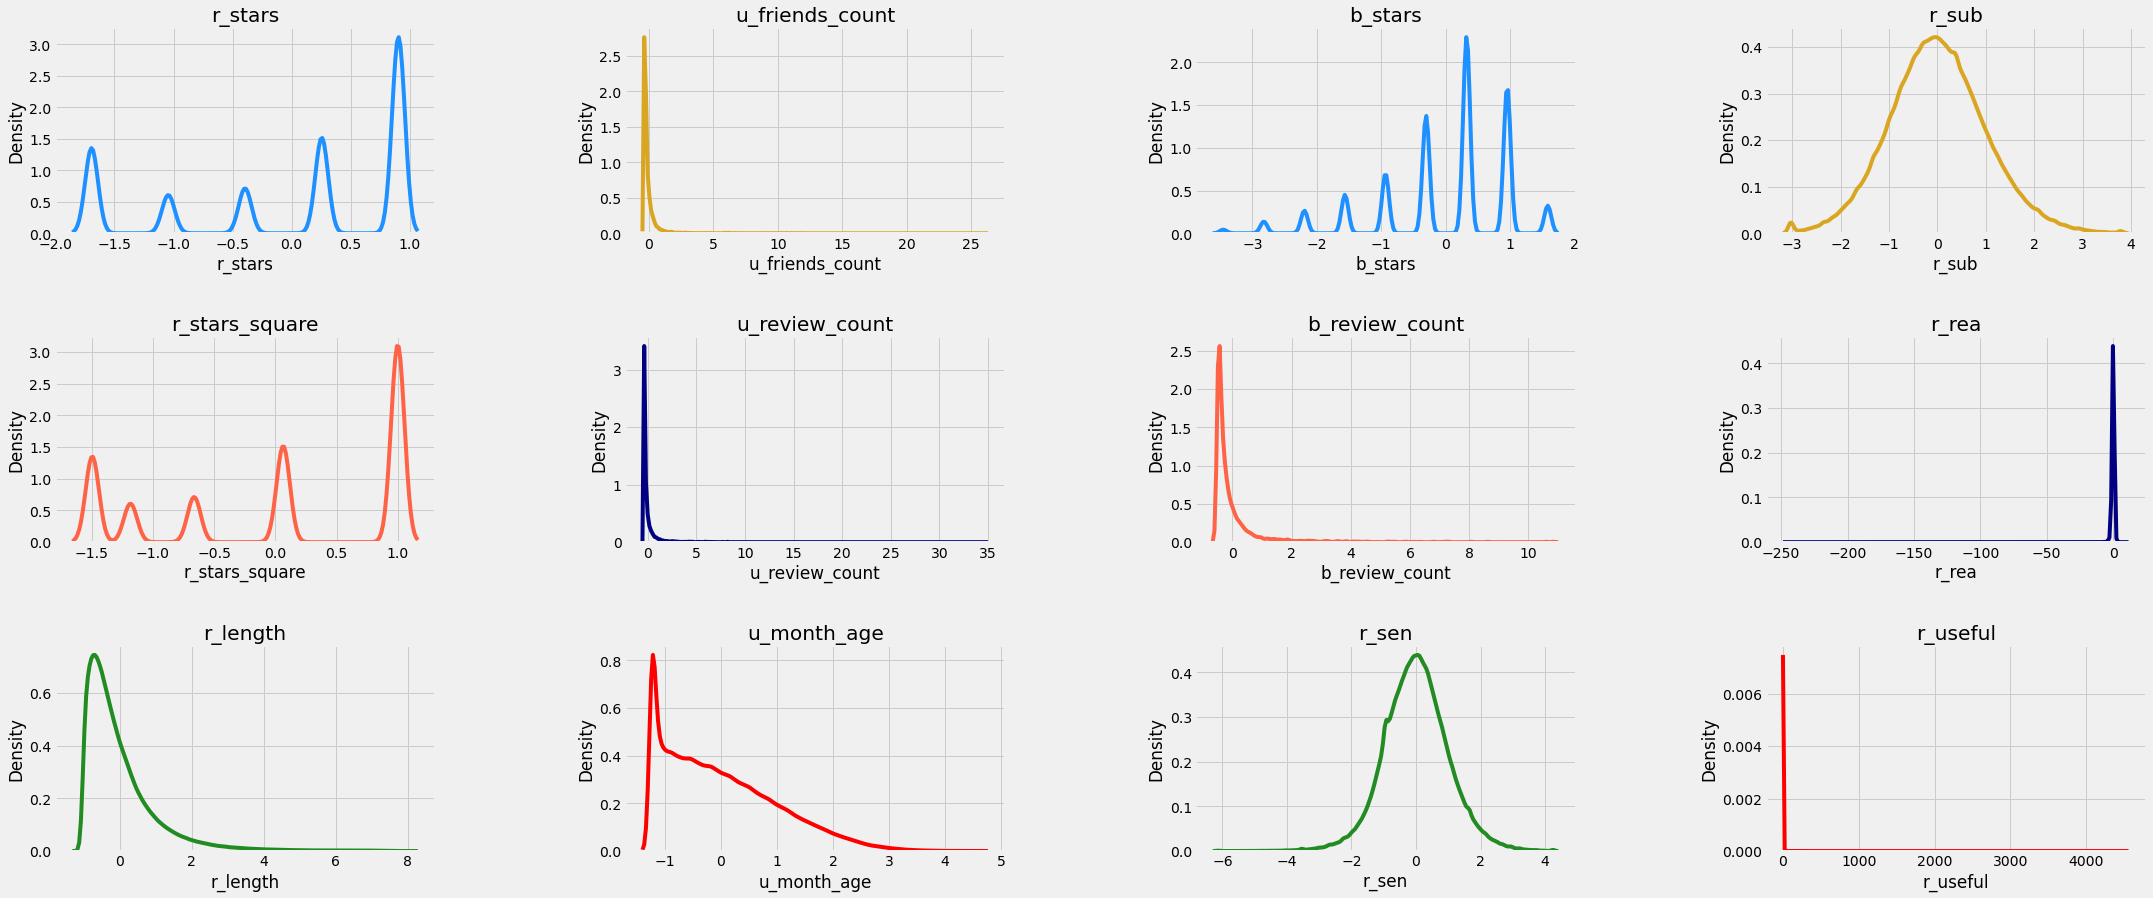

In [42]:
cols = df_train.drop('r_id', axis=1).columns.tolist()
fig, ax = plt.subplots(3, 4, figsize=(12, 8))
colors = ["dodgerblue", "tomato", "forestgreen", "goldenrod", "navy", "red"]
plt.subplots_adjust(top=1.5, right=2.5, hspace=.5, wspace=.5)

for i, c in enumerate(cols):
    ax[i%3, i//3].set_title(c)
    sns.kdeplot(x=c, data=df_train, ax=ax[i%3, i//3], color=colors[i % 6])

plt.show()